In [ ]:
# Import dipendeze

In [ ]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt

In [ ]:
# Caricamento dati

In [ ]:
#Modifica la precisione nella visualizzazione delle cifre
pd.options.display.precision = 10

## Importa i dati dal file excel
df_DatiSensori = pd.read_excel('Dati_gruppo1.xlsx')

# Mostra tutte le colonne
# pd.set_option('display.max_rows', None)

# Creazione di un dataframe di lavoro
# crea una copia del dataset
df_Dati = df_DatiSensori.copy()

In [ ]:
# crea una copia del dataset
df_Dati = df_DatiSensori.copy()
df_Dati

In [ ]:
# Pulizia dataset

In [ ]:
#Rinomina le colonne con carattersi speciali e assegna la soglia 
df_Dati.rename(columns = {'C6H6_ug/m3':'C6H6_ug_m3', 'H2S_ug/m3':'H2S_ug_m3', 'H2SJ_ug/m3':'H2SJ_ug_m3'}, inplace = True)
theshold = 24

In [ ]:
#Restituisce la lista con i valori della colonna e assegna il valore NaN ai theshold-valori consescutivi
def find_fail(colonna,df,threshold):
    dfSensor = df[['Data', colonna]]
    indexList = []
    lista = []
    for indexRows in range(len(dfSensor)):
      if(dfSensor.at[indexRows,colonna] == 0):
        indexList.append(indexRows)
    for idx in range(len(indexList)-1):
      if(indexList[idx] == indexList[idx+1]-1):
        lista.append( indexList[idx])
        lista.append( indexList[idx+1])
      else:
        lista.clear()
    if(len(lista) < threshold):
      lista.clear()
    for idxDataFrame in range(len(dfSensor)):
      if idxDataFrame in lista:
        dfSensor.drop([idxDataFrame], axis=0, inplace=True)
    return dfSensor

In [ ]:
#funzione find_fail sostituisce NaN, così evitiamo una coversione inutile
# def find_fail(column, df, theshold):
#   dfSensor = df[[column]]
#   sensor_list = dfSensor[column].values.tolist()
#   sensor_indexList = find_repeats(sensor_list, 0, theshold)
#   dfSensor[column] = pd.DataFrame(sensor_indexList)
#   return dfSensor

In [ ]:
dfTRS = df_Dati[['postazione', 'Data']]
dfTRS['TRS_ppb'] = find_fail('TRS_ppb', df_Dati, theshold) #TRS_ppb
dfVOC = df_Dati[['postazione', 'Data']]
dfVOC['VOC_ppm'] = find_fail('VOC_ppm', df_Dati, theshold) #VOC_ppm
dfC6H6 = df_Dati[['postazione', 'Data']]
dfC6H6['C6H6_ug_m3'] = find_fail('C6H6_ug_m3', df_Dati, theshold) #C6H6_ug/m3
dfH2S = df_Dati[['postazione', 'Data']]
dfH2S['H2S_ug_m3'] = find_fail('H2S_ug_m3', df_Dati, theshold) #H2S_ug/m3
dfH2SJ = df_Dati[['postazione', 'Data']]
dfH2SJ['H2SJ_ug_m3'] = find_fail('H2SJ_ug_m3', df_Dati, theshold) #H2SJ_ug/m3
dfPIDVOC = df_Dati[['postazione', 'Data']]
dfPIDVOC['PIDVOC_ppb'] = find_fail('PIDVOC_ppb', df_Dati, theshold) #PIDVOC_ppb

In [ ]:
dfTRS = df_Dati['Data']
dfTRS['TRS_ppb'] = find_fail('TRS_ppb', df_Dati, theshold) 
dfTRS

In [ ]:
# elimina i valori NaN e i valori ND
df_DatiPuliti = df_Dati[~df_Dati.TRS_stato.str.match('ND')]
df_DatiPuliti = df_Dati.dropna().reset_index(drop=True)

In [ ]:
# df_Dati
# scrive il dataset su disco
# df_DatiPuliti.to_excel('datiPuliti.xlsx')

In [ ]:
# crea una lista con tutti gli indici degli 0 presenti nella colonna TRS_ppb del dataset
# zero_indices_list = df_DatiPuliti.index[df_DatiPuliti["TRS_ppb"] == 0].tolist()
# zero_indices_list

col_List = df_Dati.TRS_ppb.values.tolist()
indexList = find_repeats(col_List, 0, 24)
df_Dati['TRS_ppb'] = pd.DataFrame(indexList)

for indexDataFrame in range(len(df_Dati)):
  if(df_Dati.at[indexDataFrame, 'TRS_ppb'] == True):
    df_Dati.drop(indexDataFrame, inplace=True)


In [ ]:
df_DatiPuliti

In [ ]:
# # QUERY

In [ ]:
# Query 1

In [ ]:
# query effettuata con un unico comando
# df_Benzene = df_DatiSensori.sort_values(by='C6H6_ug/m3', ascending =False)[['postazione', 'Data', 'C6H6_ug/m3']].head(100)

# creazione di un dataFrame ordinato in modo discendente per i valori di benzene
df_C6H6 = df_DatiPuliti.sort_values(by='C6H6_ug_m3', ascending =False).drop_duplicates(subset=['Data'])
# creazione di un dataFrame contenente i 100 maggiori valori di benzene
df_C6H6 = df_C6H6[['postazione', 'Data', 'C6H6_ug_m3']]
df_C6H6.head(100)

In [ ]:
# Query 2

In [ ]:
# sensore H2S

# query effettuata con un unico comando
# df_H2S = df_DatiSensori.sort_values(by='H2S_ug/m3', ascending =False)[['postazione', 'Data', 'H2S_ug/m3']].head(100)

# creazione di un dataFrame ordinato in modo discendente per i valori di acido solfidrico del sensore H2S
df_H2S = df_DatiPuliti.sort_values(by='H2S_ug_m3', ascending =False).drop_duplicates(subset=['Data'])
# creazione di un dataFrame contenente i 100 maggiori valori di acido solfidrico del sensore H2SJ
df_H2S = df_H2S[['postazione', 'Data', 'H2S_ug_m3']].head(100)
df_H2S

In [ ]:
# sensore H2SJ

# query effettuata con un unico comando
# df_H2SJ = df_DatiSensori.sort_values(by='H2SJ_ug/m3', ascending =False)[['postazione', 'Data', 'H2SJ_ug/m3']].head(100)

# creazione di un dataFrame ordinato in modo discendente per i valori di acido solfidrico del sensore H2SJ
df_H2SJ = df_DatiPuliti.sort_values(by='H2SJ_ug_m3', ascending =False).drop_duplicates(subset=['Data'])
# creazione di un dataFrame contenente i 100 maggiori valori di acido solfidrico del sensore H2SJ
df_H2SJ = df_H2SJ[['postazione', 'Data', 'H2SJ_ug_m3']].head(100)
df_H2SJ

In [ ]:
# Query 3

In [ ]:
# sensore VOC

# query effettuata con un unico comando
# df_VOC = df_DatiSensori.sort_values(by='VOC_ppm', ascending =True)[['postazione', 'Data', 'VOC_ppm']].head(100)

# creazione di un dataFrame ordinato in modo discendente per i valori del sensore VOC
df_VOC = df_DatiPuliti.sort_values(by='VOC_ppm', ascending =True).drop_duplicates(subset=['Data'])
# creazione di un dataFrame contenente i 100 più bassi valori del sensore VOC
df_VOC = df_VOC[['postazione', 'Data', 'VOC_ppm']].head(100)
df_VOC

In [ ]:
# sensore PIDVOC

# query effettuata con un unico comando
# df_PIDVOC = df_DatiSensori.sort_values(by='PIDVOC_ppb', ascending =True)[['postazione', 'Data', 'PIDVOC_ppb']].head(100)

# creazione di un dataFrame ordinato in modo discendente per i valori del sensore PIDVOC
df_PIDVOC = df_DatiPuliti.sort_values(by='PIDVOC_ppb', ascending =True).drop_duplicates(subset=['Data'])
# creazione di un dataFrame contenente i 100 più bassi valori del sensore PIDVOC
df_PIDVOC = df_PIDVOC[['postazione', 'Data', 'PIDVOC_ppb']].head(100)
df_PIDVOC

In [ ]:
# Query 4

In [ ]:
# funzione che permette di eliminare i valori nulli, calcola la media oraria e restituisce un dataframe ordinato sull'ora
def media_oraria(df, compound ):
  df1 = df[['postazione', 'Data', compound]].copy()
  df1['Data'] = pd.to_datetime(df1['Data'])
  df1 = df1[df1[compound].notna()]
  indexName = df1[(df1[compound]==0)].index
  df1.drop(indexName, inplace = True)
  return df1, df1[['Data', compound]].resample("H", label = 'right', on = 'Data').mean()

In [ ]:
# Creazione dataframe ordinato sulla media oraria
df_C6H6, df_C6H6avg = media_oraria(df_DatiPuliti, 'C6H6_ug_m3')

In [ ]:
# Stampa le 50 ore con i livelli di benzene più alti
df_C6H6Max = df_C6H6avg.sort_values('C6H6_ug_m3', ascending = False).head(50)
df_C6H6Max

In [ ]:
# Stampa le 50 ore con i livelli di benzene più bassi
df_C6H6Min = df_C6H6avg.sort_values('C6H6_ug_m3', ascending = True).head(50)
df_C6H6Min

In [ ]:
# Query 5

In [ ]:
#Elimina i valori nulli e calcola la media oraria sul dataframe creato per il sensore H2S
df_H2S, df_H2Savg = media_oraria(df_DatiPuliti, 'H2S_ug_m3')

In [ ]:
# Stampa le 50 ore con i livelli di acido solfidrico del sensore H2S più alti
df_H2SMax= df_H2Savg.sort_values('H2S_ug_m3', ascending = False).head(50)
df_H2SMax

In [ ]:
# Stampa le 50 ore con i livelli di acido solfidrico del sensore H2S più basso
df_H2SMin= df_H2Savg.sort_values('H2S_ug_m3', ascending = True).head(50)
df_H2SMin

In [ ]:
#Elimina i valori nulli e calcola la media oraria sul dataframe creato per il sensore H2SJ
df_H2SJ, df_H2SJavg = media_oraria(df_DatiPuliti, 'H2SJ_ug_m3')

In [ ]:
# Stampa le 50 ore con i livelli di acido solfidrico del sensore H2SJ più alti
df_H2SJMax= df_H2SJavg.sort_values('H2SJ_ug_m3', ascending = False).head(50)
df_H2SJMax

In [ ]:
# Stampa le 50 ore con i livelli di acido solfidrico del sensore H2SJ più bassi
df_H2SJMin= df_H2SJavg.sort_values('H2SJ_ug_m3', ascending = True).head(50)
df_H2SJMin

In [ ]:
# Query 6

In [ ]:
#Elimina i valori nulli e calcola la media oraria sul dataframe creato per il sensore VOC
df_VOC, df_VOCavg = media_oraria(df_DatiPuliti, 'VOC_ppm')

In [ ]:
# Stampa le 50 ore con i livelli di VOC del sensore VOC più alti
df_VOCMax= df_VOCavg.sort_values('VOC_ppm', ascending = False).head(50)
df_VOCMax

In [ ]:
# Stampa le 50 ore con i livelli di VOC del sensore VOC più bassi
df_VOCMin= df_VOCavg.sort_values('VOC_ppm', ascending = True).head(50)
df_VOCMin

In [ ]:
#Elimina i valori nulli e calcola la media oraria sul dataframe creato per il sensore PIDVOC
df_PIDVOC, df_PIDVOCavg = media_oraria(df_DatiPuliti, 'PIDVOC_ppb')

In [ ]:
# Stampa le 50 ore con i livelli di VOC del sensore PIDVOC più alti
df_PIDVOCMax= df_PIDVOCavg.sort_values('PIDVOC_ppb', ascending = False).head(50)
df_PIDVOCMax

In [ ]:
# Stampa le 50 ore con i livelli di VOC del sensore PIDVOC più bassi
df_PIDVOCMin= df_PIDVOCavg.sort_values('PIDVOC_ppb', ascending = True).head(50)
df_PIDVOCMin

In [ ]:
# Creazione di un dataset per la media oraria

In [ ]:
df_MediaOraria = df_C6H6.copy()
df_MediaOraria['H2S_ug_m3'] = df_H2S['H2S_ug_m3']
df_MediaOraria['H2SJ_ug_m3'] = df_H2SJ['H2SJ_ug_m3']
df_MediaOraria['VOC_ppm'] = df_VOC['VOC_ppm']
df_MediaOraria['PIDVOC_ppb'] = df_PIDVOC['PIDVOC_ppb']
df_MediaOraria.to_excel('media_oraria.xlsx')

In [ ]:
# Query 7 da rifare

In [ ]:
# Giornate con fallimenti ND
df_Fail_ND = df_DatiPuliti[['Data','TRS_ppb','VOC_ppm','C6H6_ug_m3','H2S_ug_m3','H2SJ_ug_m3','PIDVOC_ppb']].copy()
df_Fail_ND['Giorno'] = pd.to_datetime(df_Fail_ND['Data'].dt.strftime('%d/%m/%Y'))
df_Fail_ND = df_Fail_ND[(df_Fail_ND['TRS_ppb'].isna()) | (df_Fail_ND['VOC_ppm'].isna()) | (df_Fail_ND['C6H6_ug_m3'].isna()) | (df_Fail_ND['H2S_ug_m3'].isna()) | (df_Fail_ND['H2SJ_ug_m3'].isna()) | (df_Fail_ND['PIDVOC_ppb'].isna())]
df_Fail_ND = df_Fail_ND.groupby('Giorno').count()
df_Fail_ND

In [ ]:
# Errato
# Serve trovare anche le righe con 24 (144)(Praticamente per 12h della stessa giornata non ha registrato) 0 che sono comunque ND.
df_Fail_0 = df_DatiPuliti[['Data','TRS_ppb','VOC_ppm','C6H6_ug/m3','H2S_ug/m3','H2SJ_ug/m3','PIDVOC_ppb']].copy()
df_Fail_0['Giorno'] = pd.to_datetime(df_Fail_0['Data'].dt.strftime('%d/%m/%Y'))
df_Fail_0['TRS_ppb'].astype(float)
df_Fail_0['VOC_ppm'].astype(float)
df_Fail_0['C6H6_ug/m3'].astype(float)
df_Fail_0['H2S_ug/m3'].astype(float)
df_Fail_0['H2SJ_ug/m3'].astype(float)
df_Fail_0['PIDVOC_ppb'].astype(float)
df_Fail_0 = df_Fail_0[(df_Fail_0['TRS_ppb'] == 0) | (df_Fail_0['VOC_ppm'] == 0) | (df_Fail_0['C6H6_ug/m3']== 0) | (df_Fail_0['H2S_ug/m3']== 0) | (df_Fail_0['H2SJ_ug/m3']== 0) | (df_Fail_0['PIDVOC_ppb']== 0)]
df_Fail_0 = df_Fail_0.groupby('Giorno').count()
# df_Fail_0 = df_Fail_0[(df_Fail_0.Data >= 144)]
df_Fail_0 = df_Fail_0[(df_Fail_0.Data >= 24)]
df_Fail_0

In [ ]:
#Unisco i dati per i fallimenti(Banale union)
df_fail = pd.concat([df_Fail_ND, df_Fail_0])

In [ ]:
#3 giorni con il maggior numero di fallimenti
df_fail.sort_values(['Data'], ascending=False).head(3)

In [ ]:
#3 giorni con il minor numero di fallimenti
df_fail.sort_values(['Data'], ascending=True).head(3)

In [ ]:
# Query 8 da rifare

In [ ]:
# 3 giornate con il minor numero di fallimenti (manca il calcolo dei 24 zeri consecutivi)
df_Fail = df_DatiPuliti[['Data','C6H6_ug_m3']].copy()
df_Fail['Data'] = pd.to_datetime(df_Fail['Data'].dt.strftime('%d/%m/%Y'))
df_Fail['Giorno'] = df_Fail['Data']
df_Fail = df_Fail[df_Fail['C6H6_ug_m3'].isna()]
df_Fail = df_Fail[(df_Fail['C6H6_ug_m3']!='0')]
df_Fail = df_Fail.groupby('Giorno').count().sort_values('Data', ascending = True)
df_Fail.head(3)

In [ ]:
# Query 9, 10 e 11

In [ ]:
# crea due liste con tutti gli inquinanti e i relativi stati
inquinanti = ['TRS_ppb','VOC_ppm','C6H6_ug_m3','H2S_ug_m3','H2SJ_ug_m3','PIDVOC_ppb']
stato_Inquinanti = ['TRS_stato','VOC_stato','C6H6_stato', 'H2S_stato','H2SJ_stato', 'PIDVOC_stato']

In [ ]:
# crea un dataframe che contiene la somma dei fallimenti 
# oltre alle righe con 'ND' che indicano il fallimento nel trasmettere i dati, consideriamo fallimento
# anche la presenza consecutiva massiccia di valori 0
fails = []
df_NFails = pd.DataFrame({'Fallimenti':np.arange(6)})
df_NFails = pd.DataFrame({'Sensori':np.arange(6)})
for column in range(len(inquinanti)):
    df_Fail = df_Dati[[inquinanti[column], stato_Inquinanti[column]]].copy()
    errors = df_Fail[inquinanti[column]].ne(df_Fail
                                  [inquinanti[column]].shift()).cumsum()[df_Fail
                                                                         [inquinanti[column]].eq(0.0)].value_counts().ge(24).sum()
    num_ND= df_Fail[stato_Inquinanti[column]].value_counts()["ND"]
    fails.append(num_ND + errors)

df_NFails['Sensori'] = inquinanti
df_NFails['Fallimenti'] = fails
df_NFails


In [ ]:
# Query 9

In [ ]:
df_NFails['Dati TOT'] = len(df_DatiSensori)
# cambiare i dati tot con quelli di ogni sensore
df_NFails['Media'] = df_NFails['Fallimenti'].div(len(df_DatiSensori))
df_NFails

In [ ]:
# Query 10

In [ ]:
# Prende il massimo dal dataframe
df_NFails['Fallimenti'].max()

In [ ]:
# Query 11

In [ ]:
# Prende il minimo dal dataframe
df_NFails['Fallimenti'].min()

In [ ]:
# # CORRELAZIONI

In [ ]:
# Funzione correlazione
def corr_Sensori(df, compound1, compound2, postazione = None):
    if postazione != None:
        df1 = df[df['postazione'] == postazione]
    else:
        df1 = df.copy()
    df1.plot.scatter(x= compound1, y=compound2)
    a,b = np.polyfit(df1[compound1].to_list(), df1[compound2].to_list(), 1) #Inferiamo y =ax + b
    x1 = min(df1[compound1].to_list())
    x2 = max(df1[compound1].to_list())
    plt.plot([x1,x2], [a*x1 +b, a*x2 +b], color = 'red')
    plt.show()
    cc = np.corrcoef(df1[compound1], df1[compound2])[1,0]
    cs = df1[[compound1, compound2]].corr(method = 'spearman')
    return cc, cs.iloc[1,0]

In [ ]:
# CORRELAZIONE 1 TRA I SENSORI H2S E H2SJ NELLE VARIE POSTAZIONI

In [ ]:
# Crea un dataframe contenente entrambi i sensori, rinomina le colonne ed elimina i valori nulli
df_AcidoSolf = df_DatiPuliti[['postazione', 'Data', 'H2S_ug_m3', 'H2SJ_ug_m3']]
df_AcidoSolf = df_AcidoSolf.dropna()
df_AcidoSolf

In [ ]:
# correlazione per la stazione ATM05_01479
pearson, spearman= corr_Sensori(df_AcidoSolf, 'H2S_ug_m3', 'H2SJ_ug_m3','ATM05_01479')
print('Coefficiente di correlazione tra H2S e H2SJ con pearson per la postazione ATM05_01479 è ', pearson)
print('Coefficiente di correlazione tra H2S e H2SJ con spearman per la postazione ATM05_01479 è ', spearman)

In [ ]:
# correlazione per la stazione ATM07_01480
pearson, spearman = corr_Sensori(df_AcidoSolf, 'H2S_ug_m3', 'H2SJ_ug_m3', 'ATM07_01480')
print('Coefficiente di correlazione tra H2S e H2SJ con pearson per la postazione ATM07_01480 è ', pearson)
print('Coefficiente di correlazione tra H2S e H2SJ con spearman per la postazione ATM07_01480 è ', spearman)

In [ ]:
# correlazione per la stazione ATM10_01481
pearson, spearman = corr_Sensori(df_AcidoSolf, 'H2S_ug_m3', 'H2SJ_ug_m3', 'ATM10_01481' )
print('Coefficiente di correlazione tra H2S e H2SJ con pearson per la postazione ATM10_01481 è ', pearson)
print('Coefficiente di correlazione tra H2S e H2SJ con spearman per la postazione ATM10_01481 è ', spearman)

In [ ]:
# correlazione per la stazione ATM14_01486
pearson, spearman= corr_Sensori(df_AcidoSolf, 'H2S_ug_m3', 'H2SJ_ug_m3', 'ATM14_01486' )
print('Coefficiente di correlazione tra H2S e H2SJ con pearson per la postazione ATM14_01486 è ', pearson)
print('Coefficiente di correlazione tra H2S e H2SJ con spearman per la postazione ATM14_01486 è ', spearman)

In [ ]:
# CORRELAZIONE 2 TRA I SENSORI VOC E PIDVOC NELLE VARIE POSTAZIONI

In [ ]:
# Crea un dataframe contenente entrambi i sensori, rinomina le colonne ed elimina i valori nulli
df_SensoriVOC = df_DatiPuliti[['postazione', 'Data', 'VOC_ppm', 'PIDVOC_ppb']]
df_SensoriVOC = df_SensoriVOC.dropna()
df_SensoriVOC

In [ ]:
# correlazione per la stazione ATM05_01479
pearson, spearman= corr_Sensori(df_SensoriVOC, 'VOC_ppm', 'PIDVOC_ppb', 'ATM05_01479' )
print('Coefficiente di correlazione tra VOC e PIDVOC con pearson per la postazione ATM05_01479 è ', pearson)
print('Coefficiente di correlazione tra VOC e PIDVOC con spearman per la postazione ATM05_01479 è ', spearman)

In [ ]:
# correlazione per la stazione ATM07_01480
pearson, spearman = corr_Sensori(df_SensoriVOC, 'VOC_ppm', 'PIDVOC_ppb', 'ATM07_01480' )
print('Coefficiente di correlazione tra VOC e PIDVOC con pearson per la postazione ATM07_01480 è ', pearson)
print('Coefficiente di correlazione tra VOC e PIDVOC con spearman per la postazione ATM07_01480 è ', spearman)

In [ ]:
# correlazione per la stazione ATM10_01481
pearson, spearman = corr_Sensori(df_SensoriVOC, 'VOC_ppm', 'PIDVOC_ppb' , 'ATM10_01481')
print('Coefficiente di correlazione tra VOC e PIDVOC con pearson per la postazione ATM10_01481 è ', pearson)
print('Coefficiente di correlazione tra VOC e PIDVOC con spearman per la postazione ATM10_01481 è ', spearman)

In [ ]:
# correlazione per la stazione ATM14_01486
pearson, spearman= corr_Sensori(df_SensoriVOC, 'VOC_ppm', 'PIDVOC_ppb', 'ATM14_01486' )
print('Coefficiente di correlazione tra VOC e PIDVOC con pearson per la postazione ATM14_01486 è ', pearson)
print('Coefficiente di correlazione tra VOC e PIDVOC con spearman per la postazione ATM14_01486 è ', spearman)

In [ ]:
# CORRELAZIONE 3 TRA I SENSORI TRS E H2S NELLE VARIE POSTAZIONI

In [ ]:
df_SenTRS_H2S = df_DatiPuliti[['postazione', 'Data', 'TRS_ppb', 'H2S_ug_m3']]
df_SenTRS_H2S = df_SenTRS_H2S.dropna()
df_SenTRS_H2S

In [ ]:
# correlazione per la stazione ATM05_01479
pearson, spearman = corr_Sensori(df_SenTRS_H2S, 'TRS_ppb', 'H2S_ug_m3', 'ATM05_01479' )
print('Coefficiente di correlazione tra TRS e H2S con pearson per la postazione ATM05_01479 è ', pearson)
print('Coefficiente di correlazione tra TRS e H2S con spearman per la postazione ATM05_01479 è ', spearman)

In [ ]:
# correlazione per la stazione ATM07_01480
pearson, spearman= corr_Sensori(df_SenTRS_H2S, 'TRS_ppb', 'H2S_ug_m3', 'ATM07_01480' )
print('Coefficiente di correlazione tra TRS e H2S con pearson per la postazione ATM07_01480 è ', pearson)
print('Coefficiente di correlazione tra TRS e H2S con spearman per la postazione ATM07_01480 è ', spearman)

In [ ]:
# correlazione per la stazione ATM10_01481
pearson, spearman= corr_Sensori(df_SenTRS_H2S, 'TRS_ppb', 'H2S_ug_m3', 'ATM10_01481' )
print('Coefficiente di correlazione tra TRS e H2S con pearson per la postazione ATM10_01481 è ', pearson)
print('Coefficiente di correlazione tra TRS e H2S con spearman per la postazione ATM10_01481 è ', spearman)

In [ ]:
# correlazione per la stazione ATM14_01486
pearson, spearman= corr_Sensori(df_SenTRS_H2S, 'TRS_ppb', 'H2S_ug_m3', 'ATM14_01486' )
print('Coefficiente di correlazione tra TRS e H2S con pearson per la postazione ATM14_01486 è ', pearson)
print('Coefficiente di correlazione tra TRS e H2S con spearman per la postazione ATM14_01486 è ', spearman)

In [ ]:
# CORRELAZIONE 4 TRA I SENSORI TRS E H2SJ NELLE VARIE POSTAZIONI

In [ ]:
df_SenTRS_H2SJ = df_DatiPuliti[['postazione', 'Data', 'TRS_ppb', 'H2SJ_ug_m3']]
df_SenTRS_H2SJ = df_SenTRS_H2SJ.dropna()
df_SenTRS_H2SJ

In [ ]:
# correlazione per la stazione ATM05_01479
pearson, spearman= corr_Sensori(df_SenTRS_H2SJ, 'TRS_ppb', 'H2SJ_ug_m3' , 'ATM05_01479')
print('Coefficiente di correlazione tra TRS e H2SJ con pearson per la postazione ATM05_01479 è ', pearson)
print('Coefficiente di correlazione tra TRS e H2SJ con spearman per la postazione ATM05_01479 è ', spearman)

In [ ]:
# correlazione per la stazione ATM07_01480
pearson, spearman= correlation(df_SenTRS_H2SJ, 'TRS_ppb', 'H2SJ_ug_m3', 'ATM07_01480' )
print('Coefficiente di correlazione tra TRS e H2SJ con pearson per la postazione ATM07_01480 è ', pearson)
print('Coefficiente di correlazione tra TRS e H2SJ con spearman per la postazione ATM07_01480 è ', spearman)

In [ ]:
# correlazione per la stazione ATM10_01481
pearson, spearman= corr_Sensori(df_SenTRS_H2SJ, 'TRS_ppb', 'H2SJ_ug_m3' , 'ATM10_01481')
print('Coefficiente di correlazione tra TRS e H2SJ con pearson per la postazione ATM10_01481 è ', pearson)
print('Coefficiente di correlazione tra TRS e H2SJ con spearman per la postazione ATM10_01481 è ', spearman)

In [ ]:
# correlazione per la stazione ATM14_01486
pearson, spearman= corr_Sensori(df_SenTRS_H2SJ, 'TRS_ppb', 'H2SJ_ug_m3' , 'ATM14_01486')
print('Coefficiente di correlazione tra TRS e H2SJ con pearson per la postazione ATM14_01486 è ', pearson)
print('Coefficiente di correlazione tra TRS e H2SJ con spearman per la postazione ATM14_01486 è ', spearman)

In [ ]:
# CORRELAZIONE 5 TRA I SENSORI VOC E C6H6 NELLE VARIE POSTAZIONI

In [ ]:
df_SenVOC_C6H6 = df_DatiPuliti[['postazione', 'Data', 'VOC_ppm', 'C6H6_ug_m3']]
df_SenVOC_C6H6 = df_SenVOC_C6H6.dropna()
df_SenVOC_C6H6

In [ ]:
# correlazione per la stazione ATM05_01479
pearson, spearman= corr_Sensori(df_SenVOC_C6H6, 'VOC_ppm', 'C6H6_ug_m3' , 'ATM05_01479')
print('Coefficiente di correlazione tra VOC e C6H6 con pearson per la postazione ATM05_01479 è ', pearson)
print('Coefficiente di correlazione tra VOC e C6H6 con spearman per la postazione ATM05_01479 è ', spearman)

In [ ]:
# correlazione per la stazione ATM07_01480
pearson, spearman= corr_Sensori(df_SenVOC_C6H6, 'VOC_ppm', 'C6H6_ug_m3', 'ATM07_01480' )
print('Coefficiente di correlazione tra VOC e C6H6 con pearson per la postazione ATM07_01480 è ', pearson)
print('Coefficiente di correlazione tra VOC e C6H6 con spearman per la postazione ATM07_01480 è ', spearman)

In [ ]:
# correlazione per la stazione ATM10_01481
pearson, spearman= corr_Sensori(df_SenVOC_C6H6, 'VOC_ppm', 'C6H6_ug_m3' , 'ATM10_01481')
print('Coefficiente di correlazione tra VOC e C6H6 con pearson per la postazione ATM10_01481 è ', pearson)
print('Coefficiente di correlazione tra VOC e C6H6 con spearman per la postazione ATM10_01481 è ', spearman)

In [ ]:
# correlazione per la stazione ATM14_01486
pearson, spearman= corr_Sensori(df_SenVOC_C6H6, 'VOC_ppm', 'C6H6_ug_m3', 'ATM14_01486' )
print('Coefficiente di correlazione tra VOC e C6H6 con pearson per la postazione ATM14_01486 è ', pearson)
print('Coefficiente di correlazione tra VOC e C6H6 con spearman per la postazione ATM14_01486 è ', spearman)

In [ ]:
# CORRELAZIONE 6 TRA I SENSORI PIDVOC E C6H6 NELLE VARIE POSTAZIONI

In [40]:
df_SenPIDVOC_C6H6 = df_DatiPuliti[['postazione', 'Data', 'PIDVOC_ppb', 'C6H6_ug_m3']]
df_SenPIDVOC_C6H6 = df_SenPIDVOC_C6H6.dropna()
df_SenPIDVOC_C6H6

,postazione,Data,PIDVOC_ppb,C6H6_ug_m3
0,ATM05_01479,2021-04-12 00:00:00,44.5999984741,0.3000000119
1,ATM05_01479,2021-04-12 00:05:00,44.0000000000,0.2000000030
2,ATM05_01479,2021-04-12 00:10:00,44.2000007629,0.2000000030
3,ATM05_01479,2021-04-12 00:15:00,44.4000015259,0.2000000030
4,ATM05_01479,2021-04-12 00:20:00,40.7999992371,0.2000000030
...,...,...,...,...
140193,ATM14_01486,2021-11-28 23:35:00,352.6000061035,0.6000000238
140194,ATM14_01486,2021-11-28 23:40:00,350.6000061035,0.6000000238
140195,ATM14_01486,2021-11-28 23:45:00,353.0000000000,0.6000000238
140196,ATM14_01486,2021-11-28 23:50:00,352.7999877930,0.6000000238


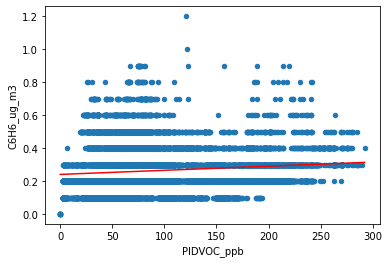

Coefficiente di correlazione tra PIDVOC e C6H6 con pearson per la postazione ATM05_01479 è  0.10441473692213753
Coefficiente di correlazione tra PIDVOC e C6H6 con spearman per la postazione ATM05_01479 è  0.17363200281853491


In [41]:
# correlazione per la stazione ATM05_01479
pearson, spearman= corr_Sensori(df_SenPIDVOC_C6H6, 'PIDVOC_ppb', 'C6H6_ug_m3', 'ATM05_01479' )
print('Coefficiente di correlazione tra PIDVOC e C6H6 con pearson per la postazione ATM05_01479 è ', pearson)
print('Coefficiente di correlazione tra PIDVOC e C6H6 con spearman per la postazione ATM05_01479 è ', spearman)

In [ ]:
# correlazione per la stazione ATM07_01480
pearson, spearman= corr_Sensori(df_SenPIDVOC_C6H6, 'PIDVOC_ppb', 'C6H6_ug_m3' , 'ATM07_01480')
print('Coefficiente di correlazione tra PIDVOC e C6H6 con pearson per la postazione ATM07_01480 è ', pearson)
print('Coefficiente di correlazione tra PIDVOC e C6H6 con spearman per la postazione ATM07_01480 è ', spearman)

In [ ]:
# correlazione per la stazione ATM10_01481
pearson, spearman= corr_Sensori(df_SenPIDVOC_C6H6, 'PIDVOC_ppb', 'C6H6_ug_m3', 'ATM10_01481' )
print('Coefficiente di correlazione tra PIDVOC e C6H6 con pearson per la postazione ATM10_01481 è ', pearson)
print('Coefficiente di correlazione tra PIDVOC e C6H6 con spearman per la postazione ATM10_01481 è ', spearman)

In [ ]:
# correlazione per la stazione ATM14_01486
pearson, spearman= corr_Sensori(df_SenPIDVOC_C6H6, 'PIDVOC_ppb', 'C6H6_ug_m3', 'ATM14_01486' )
print('Coefficiente di correlazione tra PIDVOC e C6H6 con pearson per la postazione ATM14_01486 è ', pearson)
print('Coefficiente di correlazione tra PIDVOC e C6H6 con spearman per la postazione ATM14_01486 è ', spearman)

In [ ]:
# CORRELAZIONE 7 

In [ ]:
# POSTAZIONI ATM05_01479 E ATM07_01480 

In [42]:
def creazione_df(df, colonna1, colonna2, composto, df2 = None, meteo = None):
    df_1 = df[df_Dati['postazione'] == colonna1].dropna()[composto].reset_index(drop = True).to_frame()
    if df2 is None:
        df_2 = df.copy()
    else:
        df_2 = df2.copy()
    if meteo == None:
        df_2 = df_2[df_Dati['postazione'] == colonna2].dropna()[composto].reset_index(drop = True).to_frame()
    else:
        df_2 = df_2[df_Dati['postazione'] == colonna2].dropna()[meteo].reset_index(drop = True).to_frame()
    df_Full = pd.concat([df_1, df_2], axis=1)
    df_Full.columns = ['colonna1','colonna2']
    df_Full = df_Full[['colonna1','colonna2']].fillna(0)
    return df_Full

In [ ]:
# correlazione per il sensore TRS_ppb
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM07_01480', 'TRS_ppb' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# correlazione per il sensore C6H6_ug_m3
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM07_01480', 'C6H6_ug_m3' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# correlazione per il sensore VOC_ppm
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM07_01480', 'VOC_ppm' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# correlazione per il sensore PIDVOC_ppb
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM07_01480', 'PIDVOC_ppb' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# correlazione per il sensore H2S_ug_m3
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM07_01480', 'H2S_ug_m3' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# correlazione per il sensore H2SJ_ug_m3
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM07_01480', 'H2SJ_ug_m3' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# POSTAZIONI ATM05_01479 E ATM10_01481

In [ ]:
# correlazione per il sensore TRS_ppb
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM10_01481', 'TRS_ppb' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# correlazione per il sensore C6H6_ug_m3
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM10_01481', 'C6H6_ug_m3' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# correlazione per il sensore VOC_pp
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM10_01481', 'VOC_pp,' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# correlazione per il sensore PIDVOC_ppm
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM10_01481', 'PIDVOC_ppm' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# correlazione per il sensore H2S_ug_m3
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM10_01481', 'H2S_ug_m3' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# correlazione per il sensore H2SJ_ug_m3
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM10_01481', 'H2SJ_ug_m3' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# POSTAZIONI ATM05_01479 E ATM14_01486

In [ ]:
# correlazione per il sensore TRS_ppb
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM14_01486', 'TRS_ppb' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# correlazione per il sensore C6H6_ug_m3
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM14_01486', 'C6H6_ug_m3' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# correlazione per il sensore VOC_ppm
pearsonPost4, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM14_01486', 'VOC_ppm' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# correlazione per il sensore PIDVOC_ppb
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM14_01486', 'PIDVOC_ppb' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# correlazione per il sensore H2S_ug_m3
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM14_01486', 'H2S_ug_m3' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# correlazione per il sensore H2SJ_ug_m3
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM14_01486', 'H2SJ_ug_m3' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# POSTAZIONI ATM07_01480 E ATM10_01481

In [ ]:
# correlazione per il sensore TRS_ppb
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM10_01481', 'TRS_ppb' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# correlazione per il sensore C6H6_ug_m3
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM10_01481', 'C6H6_ug_m3' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# correlazione per il sensore VOC_ppm
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM10_01481', 'VOC_ppm' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# correlazione per il sensore PIDVOC_ppb
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM10_01481', 'PIDVOC_ppb' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# correlazione per il sensore H2S_ug_m3
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM10_01481', 'H2S_ug_m3' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# correlazione per il sensore H2SJ_ug_m3
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM10_01481', 'H2SJ_ug_m3' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# POSTAZIONI ATM07_01480 E ATM14_01486

In [ ]:
# correlazione per il sensore TRS_ppb
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM14_01486', 'TRS_ppb' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# correlazione per il sensore C6H6_ug_m3
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM14_01486', 'C6H6_ug_m3' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# correlazione per il sensore VOC_ppm
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM14_01486', 'VOC_ppm' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# correlazione per il sensore PIDVOC_ppb
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM14_01486', 'PIDVOC_ppb' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# correlazione per il sensore H2S_ug_m3
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM14_01486', 'H2S_ug_m3' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# correlazione per il sensore H2SJ_ug_m3
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM14_01486', 'H2SJ_ug_m3' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# POSTAZIONI ATM10_01481 E ATM14_01486

In [ ]:
# correlazione per il sensore TRS_ppb
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM10_01481', 'ATM14_01486', 'TRS_ppb' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# correlazione per il sensore C6H6_ug_m3
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM10_01481', 'ATM14_01486', 'C6H6_ug_m3' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# correlazione per il sensore VOC_ppm
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM10_01481', 'ATM14_01486', 'VOC_ppm' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# correlazione per il sensore PIDVOC_ppb
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM14_01486', 'PIDVOC_ppb' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# correlazione per il sensore H2S_ug_m3
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM10_01481', 'ATM14_01486', 'H2S_ug_m3' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# correlazione per il sensore H2SJ_ug_m3
pearson, spearman= corr_Sensori(creazione_df(df_Dati, 'ATM10_01481', 'ATM14_01486', 'H2SJ_ug_m3' ), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)

In [ ]:
# CORRELAZIONE 8

In [ ]:
# Funzione correlazione
def corr_Sensori(df, colonna1, colonna2, postazione = None):
    if postazione != None:
        df1 = df[df['postazione'] == postazione]
    else:
        df1 = df.copy()
    df1.plot.scatter(x= colonna1, y=colonna2)
    a,b = np.polyfit(df1[colonna1].to_list(), df1[colonna2].to_list(), 1) #Inferiamo y =ax + b
    x1 = min(df1[colonna1].to_list())
    x2 = max(df1[colonna1].to_list())
    plt.plot([x1,x2], [a*x1 +b, a*x2 +b], color = 'red')
    plt.show()
    cc = np.corrcoef(df1[colonna1], df1[colonna2])[1,0]
    cs = df1[[colonna1, colonna2]].corr(method = 'spearman')
    return cc, cs.iloc[1,0]

In [ ]:
df_DatiMeteo = pd.read_excel('Dati_Meteo.xlsx')

In [ ]:
# postazione e posto sono liste correlate, ad ogni postazione corrisponde un posto e viceversa
postazione = ['ATM05_01479','ATM07_01480','ATM10_01481', 'ATM14_01486']
posto = []
sensore = ['TRS_ppb','C6H6_ug_m3', 'VOC_ppm', 'PIDVOC_ppb', 'H2S_ug_m3', 'H2SJ_ug_m3']
meteo = ['temperatura', 'direzione_vento', 'pressione', 'intensita_vento']


In [ ]:
pearson, spearman = corr_Sensori(creazione_df(df_DatiPuliti, 
                                              postazione[0], posto[0], 
                                              sensore[0], df2 = df_DatiMeteo, meteo = meteo[3]), 'colonna1', 'colonna2')
print('Coefficiente di correlazione di pearson è ', pearson)
print('Coefficiente di correlazione di spearman è ', spearman)